In [315]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

two_moon=datasets.make_moons(n_samples=100,noise=0.1)
X3=two_moon[0]
KM3=KMeans(n_clusters=3,init='random',random_state=5)
KM3.fit(X3)
index=KM3.predict(X3)
#plt.scatter(X3[:,0],X3[:,1],c=list(index))

# KMM_Function

In [313]:
import numpy as np

class Clustering(object):
    
    def __init__(self): pass
    
    # ----- Parameter -----
    # x : Data matrix
    # c : The number of cluster
    # m : The number of subcluster
    # k : The number of neighbor points
    
    
    def k_multiple_means(x,c,m,k=5):
        
        iterTimes=1000             #迭代次數
        n=np.size(x,axis=0)        #共有幾筆資料
        dim=np.size(x,axis=1)      #每筆資料的維度

        A = np.random.random([m,dim])    #亂數產生k個dim維度的值 ----------- (initial) The prototype matrix 
        
        #dist：distance matrix(initial)
        dist=np.array(np.zeros([n,m]))    
            
        #S：connection probability matrix(initial)
        S=np.array(np.ones([n,m]))   
        
        #--------用k-means找出初始index--------
            
        KM=KMeans(n_clusters=m,init='random',random_state=6)
        KM.fit(x)
        A_index=list(KM.predict(x))                            #A_index : 紀錄 Data point 屬於哪個 Prototype
        
        for count_iter in range(iterTimes):               
            
            old_A=np.copy(A)  
            A=meanIdex(x,A_index,m,S)    
             
            #--------判斷收斂--------
            th=np.linalg.norm(A-old_A)                       #計算兩個prototype的距離

            if th<np.spacing(1):                             #電腦區分兩個數的差的最小精度，當兩個數的差小於這個值，則電腦認為兩個數相等
                break
        
        A=meanIdex(x,A_index,m,S)
        #--------做完約束的 mm ，就是 A_index
        
        return A,A_index

# 測試視窗

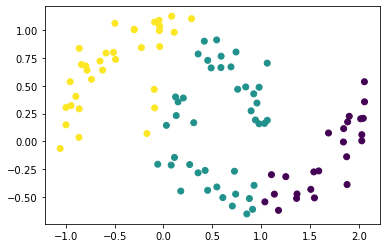

In [314]:
x=Clustering.k_multiple_means(X3,3,3,1)
plt.scatter(X3[:,0],X3[:,1],c=list(x[1]))

------------------------------------------------------
## Function "<font color='red'>meanIdex</font>" 

### 功能：更新 <font color='red'>A</font> (Prototype 座標 ) ----------> 對應公式（5）

#### **(input)**
- **x**       : Data Point<br>
- **A_index** : 紀錄 Data point 屬於哪個 Prototype (Label值)<br>
- **m**       : sub-cluster(prototype)數量<br>
- **S**       : 連接機率矩陣<br>
    
#### **(return)**
- 更新後的矩陣 **A** (Prototype 座標)<br>

In [ ]:
def meanIdex(x,A_index,m,S):

    A=np.zeros([m,2])
    n=np.size(x,axis=0)
    
    for j in range(m):
            index=0               #為了符合先乘除後加減，判斷使用
            mu=0
            su=0
            for i in range(n):       
                if A_index[i]==j:
                    
                    if index==0:
                        mu=mu+x[i]
                        mu=mu*S[i][j]
                        index=1
                    else:
                        mu=mu+(x[i]*S[i][j])
                    
                    su=su+S[i][j]
                    
            A[j]=mu/su       
    
    return A

In [ ]:
def CLR(x,c,A,k,y,l):
    
    # ----- Parameter -----
    # x : Data matrix
    # c : The number of cluster
    # A : The prototype matrix
    # k : The number of neighbor points
    
    n=np.size(x,axis=0)
    m=np.size(A,axis=0)
    
    

In [263]:
def ConstructA_NP(x,A,k=5,isSparse=1):
    
    n=np.size(x,axis=0)     #計算 Data point 數量
    m=np.size(A,axis=0)     #計算 Prototype 數量
    
    dis=np.zeros([n,m])
    
    for i in range(m):
        c=A[i]
        dis[:,i] = np.linalg.norm(x-c,axis=1)
    print(dis)
    

In [289]:
a=np.random.random([2,2])
print(a)
n=2
c=a[:,0]*n+[1:n]
print(c)

SyntaxError: invalid syntax (<ipython-input-289-1614afd4daa7>, line 4)